In [6]:
def strictly_increasing(L):
    return all(x<y for x, y in zip(L, L[1:]))

def non_decreasing(L):
    return all(x<=y for x, y in zip(L, L[1:]))

def increase_one(L):
    return all(y-x == 1 for x, y in zip(L, L[1:]))

def has_equ(L):
    return any(y == x for x, y in zip(L, L[1:]))

In [16]:
# pdb_path = "/home/wngys/scop/scope-2.07-40/y8/d2y8ga_.ent"
import numpy as np
from Bio.PDB import PDBParser
import warnings
warnings.filterwarnings('ignore')

file_list = np.load("/home/wngys/lab/DeepFold/protein_infor/entPathArray.npy", allow_pickle=True)
print(len(file_list))

parser = PDBParser()

errorSet = set()
not_inc_oneSet = set()
has_eqaSet = set()
manyChains = set()

for i, pdb_path in enumerate(file_list):
    if (i + 1)% 1000 == 0:
        print(i+1)

    structure = parser.get_structure('structure', pdb_path).get_list()[0]
    chain_num = len(structure.get_list())
    if chain_num >= 2:
        manyChains.add(pdb_path)

    for chain in structure:
        ids = [r.get_id()[1] for r in chain.get_residues()]
        # print(ids)
        increase_flag = non_decreasing(ids)
        inc_one_flag = increase_one(ids)
        has_eqa_flag = has_equ(ids)
        # print(increase_flag)
        if not increase_flag: # 不满足 任意（平或者递增）
            errorSet.add(pdb_path)
        if increase_flag and (not inc_one_flag): # 存在 平或者差值大于1
            not_inc_oneSet.add(pdb_path)
        if increase_flag and has_eqa_flag: # 存在 平
            has_eqaSet.add(pdb_path)    

14274
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


In [18]:
print("Error：", len(errorSet))
print("非Error但是不止加一: ", len(not_inc_oneSet))
print("存在相等序号:" , len(has_eqaSet))
print("多条链: ", len(manyChains))


Error： 12
非Error但是不止加一:  3287
存在相等序号: 60
多条链:  0


In [21]:
np.save("/home/wngys/lab/DeepFold/protein_infor/entPathArrayResError.npy", list(errorSet))
np.save("/home/wngys/lab/DeepFold/protein_infor/entPathArrayResIncOver1.npy", list(not_inc_oneSet))
np.save("/home/wngys/lab/DeepFold/protein_infor/entPathArrayResHaveEq.npy", list(has_eqaSet))

In [22]:
errorList = np.load("/home/wngys/lab/DeepFold/protein_infor/entPathArrayResError.npy", allow_pickle=True).tolist()
not_inc_oneList = np.load("/home/wngys/lab/DeepFold/protein_infor/entPathArrayResIncOver1.npy", allow_pickle=True).tolist()
has_eqaList = np.load("/home/wngys/lab/DeepFold/protein_infor/entPathArrayResHaveEq.npy", allow_pickle=True).tolist()
print(len(errorList))
print(len(not_inc_oneList))
print(len(has_eqaList))

12
3287
60


In [30]:
errorSet = set(errorList)
not_inc_oneSet = set(not_inc_oneList)
has_eqaSet = set(has_eqaList)
allList = np.load("/home/wngys/lab/DeepFold/protein_infor/entPathArray.npy", allow_pickle=True).tolist()
allSet = set(allList)
print(len(allSet))

14274


In [31]:
normalSet = allSet - errorSet - not_inc_oneSet - has_eqaSet
print(len(normalSet))

10975


In [33]:
normalList = list(normalSet)

In [23]:
print(type(errorSet))
print(type(not_inc_oneSet))
print(type(has_eqaSet))
print(type(errorList))
print(type(not_inc_oneList))
print(type(has_eqaList))

<class 'set'>
<class 'set'>
<class 'set'>
<class 'list'>
<class 'list'>
<class 'list'>


/home/wngys/scop/scope-2.07-40/iw/d2iw5b1.ent


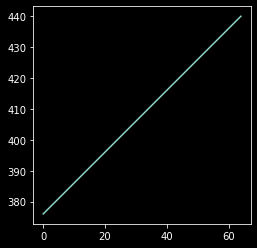

/home/wngys/scop/scope-2.07-40/uz/d1uz3a_.ent


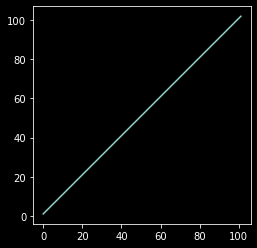

/home/wngys/scop/scope-2.07-40/rs/d3rs1a_.ent


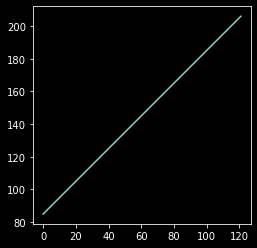

/home/wngys/scop/scope-2.07-40/nn/d2nn6b2.ent


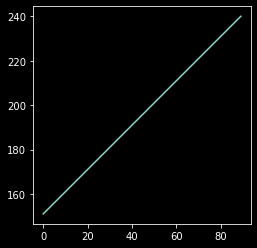

/home/wngys/scop/scope-2.07-40/yv/d1yvwa1.ent


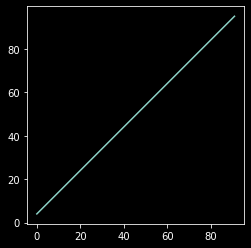

/home/wngys/scop/scope-2.07-40/v0/d2v09a_.ent


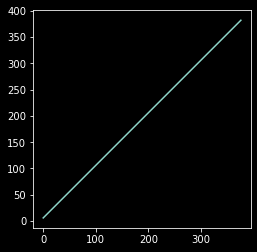

/home/wngys/scop/scope-2.07-40/pm/d3pmsa1.ent


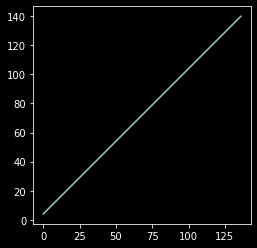

/home/wngys/scop/scope-2.07-40/px/d1px9a_.ent


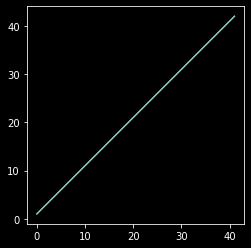

/home/wngys/scop/scope-2.07-40/h7/d3h79a_.ent


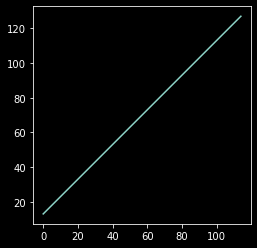

/home/wngys/scop/scope-2.07-40/ay/d3ay8a2.ent


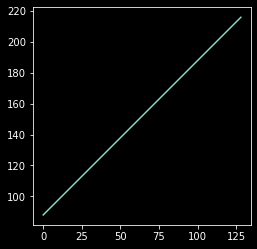

/home/wngys/scop/scope-2.07-40/jn/d2jn6a1.ent


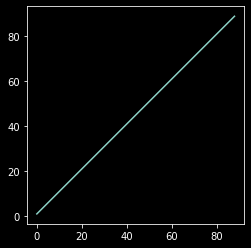

/home/wngys/scop/scope-2.07-40/tt/d1tt8a_.ent


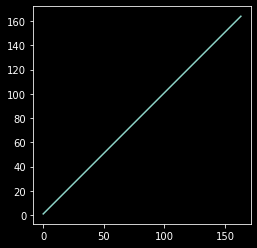

/home/wngys/scop/scope-2.07-40/ta/d1tafb_.ent


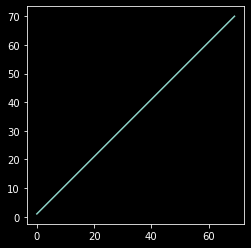

/home/wngys/scop/scope-2.07-40/ec/d2ecua_.ent


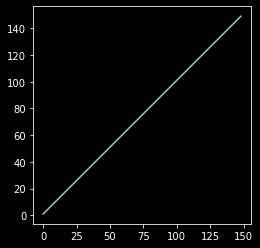

/home/wngys/scop/scope-2.07-40/ai/d1aisb2.ent


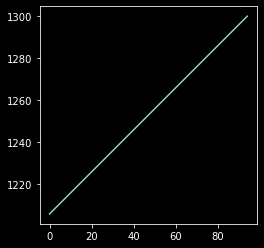

/home/wngys/scop/scope-2.07-40/fh/d2fhfa3.ent


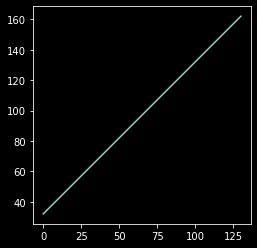

/home/wngys/scop/scope-2.07-40/wu/d4wuva_.ent


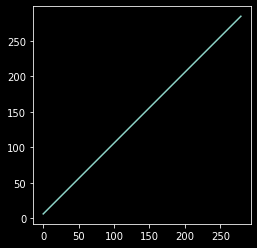

/home/wngys/scop/scope-2.07-40/c7/d1c7ka_.ent


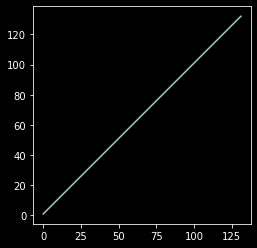

/home/wngys/scop/scope-2.07-40/bj/d2bj7a2.ent


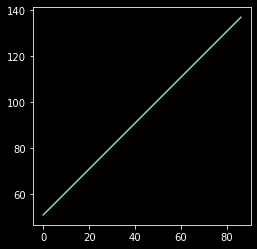

/home/wngys/scop/scope-2.07-40/z1/d1z1sa1.ent


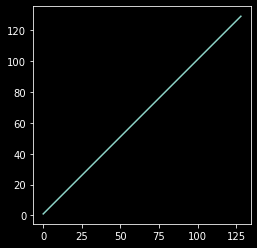

In [34]:
# 画出ent文件中残基序号的情况
import sys
import os
import numpy
import scipy
import scipy.spatial

from Bio.PDB import PDBParser
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def get_residue_ids(structure):
    ids = [r.get_id()[1] for r in structure.get_residues()]
    return ids

# pdb_path_list = errorList
# pdb_path_list = not_inc_oneList[:20]
# pdb_path_list = has_eqaList[:20]
pdb_path_list = normalList[:20]

for pdb_path in pdb_path_list:
    parser = PDBParser()
    structure = parser.get_structure('structure', pdb_path).get_list()[0]
    ids = get_residue_ids(structure)
    
    x = range(len(ids))
    plt.plot(x, ids)
    plt.gca().set_aspect(1)
    print(pdb_path)
    plt.show()